# Convolutional Neural Networks

___

*Source: [Chollet et al., Deep Learning With R](https://www.amazon.com/Deep-Learning-R-Francois-Chollet/dp/161729554X) *

___

## A new topology of networks

- standard for computer vision
- efficient also with small datasets
- text content/sentiment recognition

## How do they work
- learn from inputs **small, local, highly informative patterns**
- use these learned patterns to classify the instance given in input

## Why are they useful
#### (and why I am better off using *convnets* (*CNN*) instead of *fully connected networks* (*MLPs*) for computer vision and text recognition)
- can efficiently learn fast from **small data** (extremely common use case)
    - contrarily to multilayer perceptrons which can only learn global patterns
- **learnt patterns are translation-invariant**, hence the same instance can be recognized in different location of an image/text
 - contrarily to MLPs which can hardly be reused for a task other than the one for which they had been trained 
- previously trained **CNNs weights can be reused** in a different model
- In the context of computer vision, **it is possible to *see* how the network *learns* ** the input, by inspecting hidden layers activations
    - contrarily, MLPs are more like black-boxes
    
---  

## Convnets for computer vision

In [2]:
source('src/lib.R')

 <img src="fig/cat.PNG" width="400">
 
 *Intuitive representation of how a cat face is learnt*

## Layers
Besides the dense (i.e. fully connected) layer we already saw with multilayer perceptrons, there are two main structures we need to master to build a convolutional neural network.

### 1. **Convolutional** Layers
Hence the name of *convnets*. What they do is to create many small fully connected networks (called - we are sorry - kernels) that *sweep along* the input. Being so small, they cannot learn anything but **local** patterns.

<img src="fig/convolution.PNG" width="400">

*3x3 convolution*

In [4]:
lsp(keras, pattern = 'layer_conv')

[1] "layer_conv_1d"           "layer_conv_2d"          
[3] "layer_conv_2d_transpose" "layer_conv_3d"          
[5] "layer_conv_3d_transpose" "layer_conv_lstm_2d"

In [5]:
# let us istantiate the first convolutional layer of the network for the MNIST example

model_cnn = keras_model_sequential() %>%
            layer_conv_2d(input_shape = c(28, 28, 1),
                          kernel_size = c(3, 3),
                          filters = 32,
                          activation = "relu",
                          padding = 'valid',
                          strides = 1)

note that:
- $\texttt{input}$\_$\texttt{shape}$ indicates that the **input** is no longer a 1d-vector (condition needed for feeding a MLPs), but a 2d-**matrix**. Indeed, CNNs can directly act on the input.
- $\texttt{kernel}$\_$\texttt{size}$ indicates the **size** of the sweeping window (small fully connected layer). in this case is set to 3x3 pixels
- $\texttt{filters}$ indicates **how many** kernels we are setting up for this layer. Please note that ideally, each kernel will learn a different feature of the input, but every kernel will sweep along the entire input.

- $\texttt{padding}$ specifies whether the convolutional kernel can overshoot the boundaries of the input. This is usually done if one wants to obtain a convoluted image which is the same size of the output. Default is no padding. ($\texttt{padding = 'same'}$)

<img src="fig/convolution_padding.PNG" width="400">

*3x3 convolution, with **padding = same***

- $\texttt{strides}$ specifies whether the kernel proceeds smoothly (pixel by pixel, default behaviour) or by "jumps".

<img src="fig/convolution_strides.PNG" width="400">

*3x3 convolution, with **strides = 2***  

___

Each kernel outputs the **dot product** of its (learned) weights times its input. The result is a *filtered* representation of the input value, called **feature map**. Each of them should emphasize a peculiar aspect of it.

<img src="fig/single_convolution.PNG" width="400">

*from 3x3 convolution to feature map*


A different number of feature maps will be produced according to how many kernels have been specified by the $\texttt{filters}$ parameter.

<img src="fig/input_cat.PNG" width="200">

*1 input image*

<img src="fig/cat_layer1.PNG" width="1000">

*32 feature maps* 

### 2. **Pooling** Layers

To reduce the dimensionality of the problem we apply a **pooling layer** after each iteration: pooling layers are nothing more than hard-coded 2x2 convolutional layers with strides = 2 which are used to downsample the feature map (usually take the maximum or by averaging the input).

Applying a pooling layer allows to:
- **reduce the complexity** (number of element) in the subsequent layers (and the computational expenses required to process them),
- **without too much** information loss, due to the fact that neighbouring elements in the feature map likely signals the same local behaviour. In a way, we are sort of telling the model to *only keep the most significant points in each feature map*

In [6]:
lsp(keras, pattern = 'pooling')

[1] "layer_average_pooling_1d"        "layer_average_pooling_2d"       
 [3] "layer_average_pooling_3d"        "layer_global_average_pooling_1d"
 [5] "layer_global_average_pooling_2d" "layer_global_average_pooling_3d"
 [7] "layer_global_max_pooling_1d"     "layer_global_max_pooling_2d"    
 [9] "layer_global_max_pooling_3d"     "layer_max_pooling_1d"           
[11] "layer_max_pooling_2d"            "layer_max_pooling_3d"

In [9]:
model_cnn = model_cnn %>% layer_max_pooling_2d(pool_size = c(2, 2),
                                              padding='valid')

note that:
- $\texttt{pool}$\_$\texttt{size}$ indicates the size of the sweeping window 
- $\texttt{strides}$ defaults to the size of the pooling layer (in our case = 2)
- $\texttt{padding}$ as for convolutional layers

___

we can now finish instantiating the sequence of convolutional and pooling layers 

In [10]:
(model_cnn = model_cnn %>% layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu") %>%
                          layer_max_pooling_2d(pool_size = c(2, 2)) %>%
                          layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu"))

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 13, 13, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 11, 11, 64)              18496       
________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)      (None, 5, 5, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 3, 3, 64)                36928       
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________

### 3.  Add a **classifier on top** of the convnet

At this point **we obtained a very detailed feature representation of the input**. Our contains 64 3x3 feature maps! It is time to **use these features to classify the input**!! How? Simple! With an MLP! (early image classification models used a Support Vector Machine instead of MLPs, though it wasn't easily extensible to more than two classes)

In [11]:
(model_cnn = model_cnn %>%
            layer_flatten() %>%
            layer_dense(units = 64, activation = "relu") %>%
            layer_dense(units = 10, activation = "softmax"))

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 13, 13, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 11, 11, 64)              18496       
________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)      (None, 5, 5, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 3, 3, 64)                36928       
________________________________________________________________________________
flatten_1 (Flatten)   

where:
- $\texttt{layer}$\_$\texttt{flatten}$ converts the 64 3x3 feature maps into  a single 576 1d-vectors to be processed by the fully connected layers.

In [5]:
mnist = dataset_mnist()

c(c(train_images, train_labels), c(test_images, test_labels)) %<-% mnist

## side note: "%<-%" is the Multiple Assignment Operator
## it is a keras-defined function that concurrently assigns multiple values to a series of variables

## the data in input must be in a named list
## indeed, in our case, the mnist dataset is a list with the following structure:

##    mnist
##    . $train
##    .. $x
##    .. $y
##    . $test
##    .. $x
##    .. $y

## here, the "%<-%" assign the contents of the mnis list object to 4 independent variables
## the benefit of "%<-%" is that it is possible to do it in a single step, instead of four

## yes it's pratically useless :) but the Multiple Assignment approach comes from Python
## (and Keras/TF are "Pythonic" packages)

train_images = array_reshape(train_images, c(60000, 28, 28, 1))
train_images = train_images / 255

test_images = array_reshape(test_images, c(10000, 28, 28, 1))
test_images = test_images / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
model_cnn %>% compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = c("accuracy")
    )

model_cnn %>% fit(
    train_images,
    train_labels,
    epochs = 5,
    batch_size=64
    )

model_cnn$save('data/mnist_cnn.h5')
model_cnn$save_weights('data/mnist_cnn_w.h5')

In [6]:
model_cnn = load_model_hdf5('data/mnist_cnn.h5')
model_cnn$load_weights('data/mnist_cnn_w.h5')

In [7]:
model_cnn %>% evaluate(test_images, test_labels)

$loss
[1] 0.03589473

$acc
[1] 0.9901

There we have! A significant improvement with respect to the MLP! (c.f. previous notebooks)
___

## Visualize learning

Now that we have learned how to build a CNN, let's try to understand better what happens under the hood.

### 1. *What* a CNN learns: visualize **Feature Maps**

We said CNNs learn a feature representation of the input. Let's try to break down our network and look to the intermediate layers!

In [7]:
model_cnn$layers %>% class # we can access the layers stored a R list
model_cnn$layers %>% length # there are 8 layers
model_cnn$layers

[1] "list"

[1] 8

[[1]]
<keras.layers.convolutional.Conv2D>

[[2]]
<keras.layers.pooling.MaxPooling2D>

[[3]]
<keras.layers.convolutional.Conv2D>

[[4]]
<keras.layers.pooling.MaxPooling2D>

[[5]]
<keras.layers.convolutional.Conv2D>

[[6]]
<keras.layers.core.Flatten>

[[7]]
<keras.layers.core.Dense>

[[8]]
<keras.layers.core.Dense>


In [8]:
# we create a tensor function that takes in input an image and retyren 3 different tenstos corresponding to the
# intermediate feature map of the CNN we just trained
# the tensot function is initialized with the actual weights of the trained CNN.

(activation_model = keras_model(inputs = model_cnn$input,
                               outputs = list(model_cnn$layers[[1]]$output, # one
                                              #model_cnn$layers[[2]]$output,
                                              model_cnn$layers[[3]]$output, # two
                                              #model_cnn$layers[[4]]$output,
                                              model_cnn$layers[[5]]$output))) # and three

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1_input (InputLayer)         (None, 28, 28, 1)               0           
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 13, 13, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 11, 11, 64)              18496       
________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)      (None, 5, 5, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)     

In [9]:
batch = array_reshape(test_images[1,,,], c(1, 28, 28, 1))
activations = activation_model %>% predict(batch)

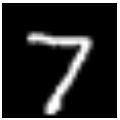

In [10]:
# input image

options(repr.plot.width=1, repr.plot.height=1)
par(mar = c(0.1, 0.1, 0.1, 0.1))
batch[,,,1] %>% as.raster %>% plot

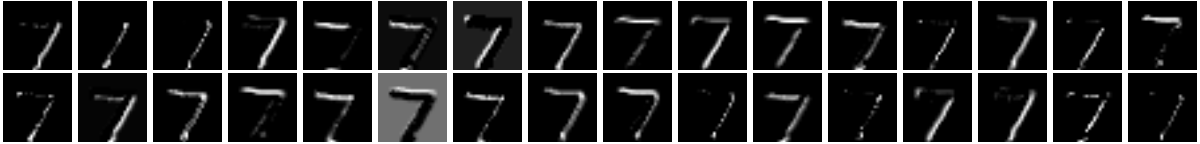

In [11]:
# first convolutional layer (32 feature maps)

options(repr.plot.width=10, repr.plot.height=1.2)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(2,16))

layer = 1

for(i in seq_len(32)){
activations[[layer]][,,,i] %>% range01 %>% as.raster %>% plot
}

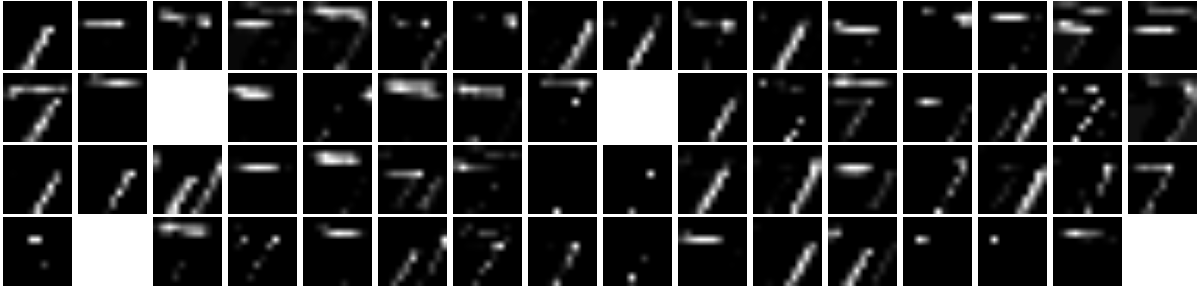

In [12]:
# second convolutional layer (64 feature maps)

options(repr.plot.width=10, repr.plot.height=2.4)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(4,16))

layer = 2

for(i in seq_len(64)){
activations[[layer]][,,,i] %>% range01 %>% as.raster %>% plot
}

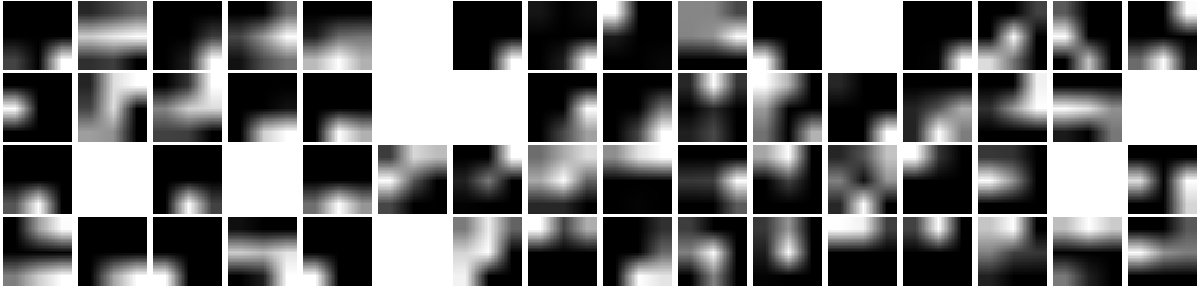

In [13]:
# third convolutional layer (64 feature maps)

options(repr.plot.width=10, repr.plot.height=2.4)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(4,16))

layer = 3

for(i in seq_len(64)){
activations[[layer]][,,,i] %>% range01 %>% as.raster %>% plot
}

All in all it is possible to see that the network **progressively decompose the input in simpler feature maps**.

### 2. *How* a CNN learns: visualize **Filters**

It is not straightforward, but - given a convolutional filter (i.e. a kernel) - we can iteratively build for the input that maximize the response (i.e. kernel's dot product) to that chosen filter. Such inputs will have the shape to which every given filter is most sensitive to.

In [14]:
model_cnn

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 13, 13, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 11, 11, 64)              18496       
________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)      (None, 5, 5, 64)                0           
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 3, 3, 64)                36928       
________________________________________________________________________________
flatten_1 (Flatten)   

In [17]:
# backend give access to soma low level TensorFlow operations
K <- backend()

# we select a layer
layer_name <- "conv2d_1"
(layer_output = get_layer(model_cnn, layer_name)$output)

# we select one among the n convolutional kernels of the chosen layer
filter_index = 2
kernel = layer_output[,,,filter_index]

#we set the loss function to be maximized as the mean of the output of that filter
(loss = K$mean(kernel))

Tensor("conv2d_1/Relu:0", shape=(?, 26, 26, 32), dtype=float32)

Tensor("Mean_1:0", shape=(), dtype=float32)

In [18]:
# we create the Jacobian matrix of gradients of the loss function we created right above
# the Jacobian matrix is a matrix of partial derivatives.
# remember we want to know how the input must change to maximize the output (quinto anno liceo scientifico!)

(grads = K$gradients(loss, model_cnn$input)[[1]])

Tensor("gradients/conv2d_1/convolution_grad/Conv2DBackpropInput:0", shape=(?, 28, 28, 1), dtype=float32)

In [19]:
# we normalize the Jacobian by its L2 norm (i.e. the square root of sum of squares)
# in order to prevent exploding gradients
# (and sum small number to jic grads = 0 [and we accidentaly divide by zero])

grads = grads / (K$sqrt(K$mean(K$square(grads))) + 1e-5)

In [20]:
# this function simply takes an image in input and returns the loss and the gradient as we specified above!

(iterate = K$`function`(inputs = c(model_cnn$input),
                        outputs = c(loss, grads)))

c(loss_value, grads_value) %<-% iterate(list(array(0, dim = c(1, 28, 28, 1)))) # multiple assignment operator (see explanation above!)

<keras.backend.tensorflow_backend.Function>

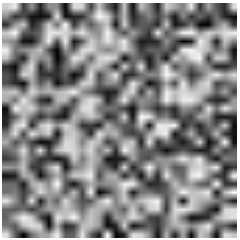

In [24]:
# create a white noise image

input_img_data = array(runif(28 * 28 * 1), dim = c(1, 28, 28, 1))
options(repr.plot.width=2, repr.plot.height=2)
par(mar = c(0.1, 0.1, 0.1, 0.1))
input_img_data[1,,,] %>% range01 %>% as.raster %>% plot

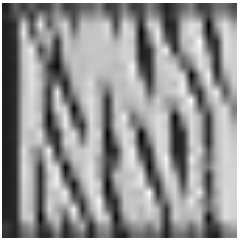

In [26]:
# perform gradient ascent and progressively reconstruct the image to which the kernel filter is most sensible to

for (i in 1:40) {
    c(loss_value, grads_value) %<-% iterate(list(input_img_data))
    input_img_data <- input_img_data + grads_value
    }

options(repr.plot.width=2, repr.plot.height=2)
par(mar = c(0.1, 0.1, 0.1, 0.1))
input_img_data[1,,,] %>% range01 %>% as.raster %>% plot

Looks like this filter is sensible to **vertical patterns!**

___

In [268]:
# let's put everything together in a nice function

get_cnn_filters = function(layer_name, filters){

layer_output = get_layer(model_cnn, layer_name)$output

options(repr.plot.width=10, repr.plot.height=0.6*filters/16)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(filters/16,16))   
    
for(filter_index in seq_len(filters)){

loss = K$mean(layer_output[,,,filter_index])

grads = K$gradients(loss, model_cnn$input)[[1]]
grads = grads / (K$sqrt(K$mean(K$square(grads))) + 1e-5)

iterate = K$`function`(inputs = c(model_cnn$input), outputs = c(loss, grads))
c(loss_value, grads_value) %<-% iterate(list(array(0, dim = c(1, 28, 28, 1))))
    
input_img_data = array(runif(28 * 28 * 1), dim = c(1, 28, 28, 1))

for (i in 1:40) {
    c(loss_value, grads_value) %<-% iterate(list(input_img_data))
    input_img_data = input_img_data + grads_value
    }

input_img_data[1,,,] %>% range01 %>% as.raster %>% plot
    
    }
    
}

...and plot some stuff!

The first layer is sensible to horizontal/vertical/diagonal patterns

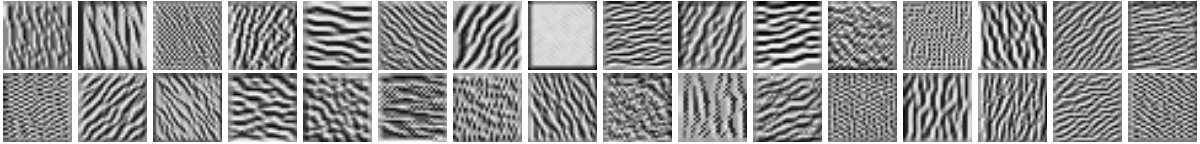

In [240]:
get_cnn_filters("conv2d_1", 32)

The second layer is still sensible to the same types of pattern yet localized in specific region of the image. Some filters haven't learnt anything (white noise).

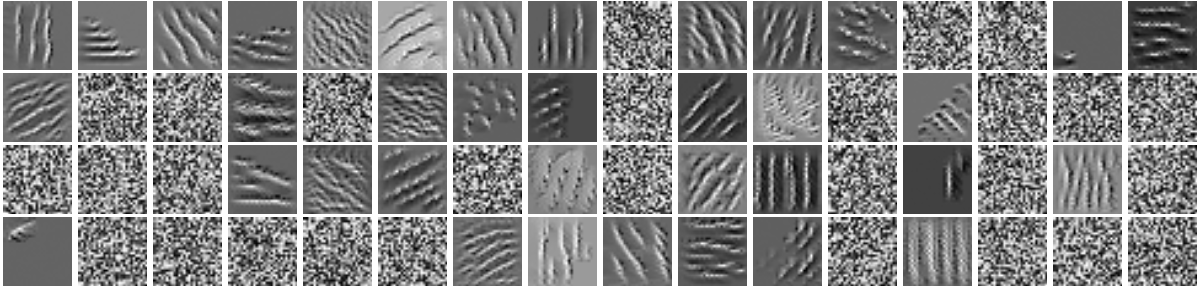

In [241]:
get_cnn_filters("conv2d_2", 64)

The third and last convolutional layer start to be sensible to curved patterns. Again, some filters haven't learnt anything (white noise).

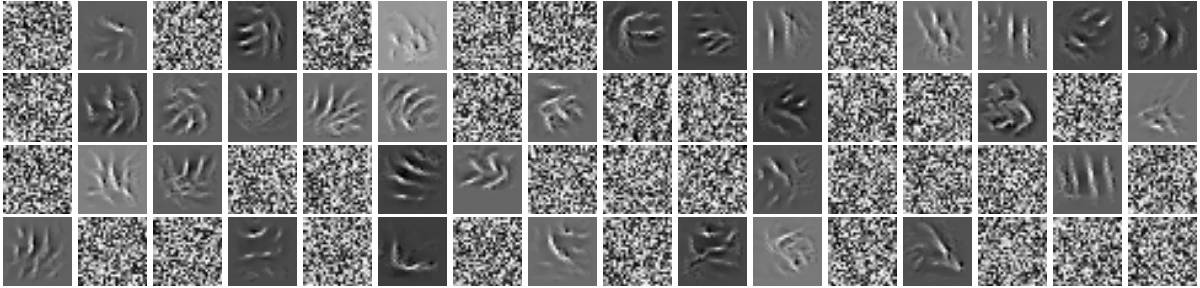

In [242]:
get_cnn_filters("conv2d_3", 64)

All in all, it is possible to observe that the network **progressively learns more complex patterns**.
___

### Fun facts

Have you ever seen those trippy images from [Google's Deep Dream](https://deepdreamgenerator.com/)? Well, now wonder how they're produced...

What about propagating a Jennifer Lawrence's pic through a CNN trained to discriminate dogs and cats?

<img src="fig/j_law.jpg" width="500">


What about this nice pet?

<img src="fig/elkette.PNG" width="380"><img src="fig/deep_elkette.PNG" width="380">

___

## Tip: data augmentation
with small data, it is sometime useful to generate more data by artificially manipulating the data available. See how we change the digit 7 with the **keras** functions $\texttt{image}$\_$\texttt{data}$\_$\texttt{generator}$ and $\texttt{flow}$\_$\texttt{images}$\_$\texttt{from}$\_$\texttt{data}$.

In [37]:
batch = array_reshape(test_images[1,,,], c(1, 28, 28, 1))

batch_large = array_reshape(c(batch, batch, batch, batch), c(4, 28, 28, 1))

In [44]:
datagen = image_data_generator(rescale = 1,
                               rotation_range = 90,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = F,
                               fill_mode = "nearest"
                                )

augmentation_generator <- flow_images_from_data(batch_large,
                                                generator = datagen,
                                                batch_size = 4
)

distorted = generator_next(augmentation_generator)

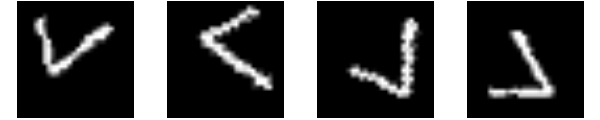

In [45]:
options(repr.plot.width=5, repr.plot.height=1)
par(mar = c(0.1, 0.1, 0.1, 0.1), mfrow=c(1,4))
for(i in 1:4){
distorted[i,,,1] %>% as.raster %>% plot
}